In [101]:
import pandas as pd
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt        # For plotting graphs

### Step 1 : Varaible Identification

In [102]:
# Importing dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [103]:
# Prints the columns in the train and test
train.columns
#test.columns
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [104]:
# Print the type of each variable
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [105]:
# print the shape of the Dataset
train.shape
test.shape

(5681, 11)

### Step 2 : Univariate Analysis

##### Target Variable is Item_Outlet_Sales

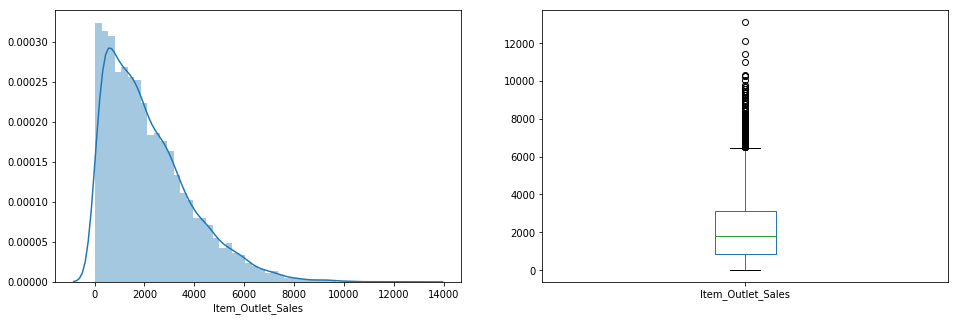

In [106]:
# Visulaize the target variable

plt.figure(1)
plt.subplot(121)
sns.distplot(train['Item_Outlet_Sales'])

plt.subplot(122)
train['Item_Outlet_Sales'].plot.box(figsize=(16,5))

plt.show()

### Independent Variables (Categorical)

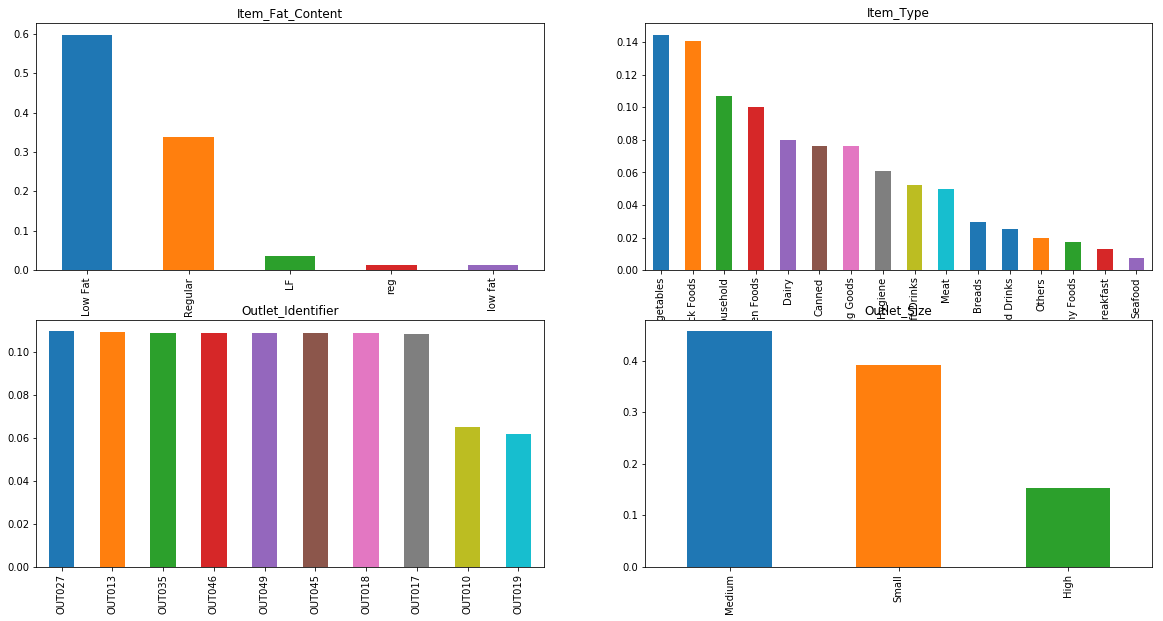

In [107]:
plt.figure(1)
plt.subplot(221)
train['Item_Fat_Content'].value_counts(normalize=True).plot.bar(figsize=(20,10),title= "Item_Fat_Content")

plt.subplot(222)
train['Item_Type'].value_counts(normalize=True).plot.bar(figsize=(20,10),title= "Item_Type")

plt.subplot(223)
train['Outlet_Identifier'].value_counts(normalize=True).plot.bar(figsize=(20,10),title= "Outlet_Identifier")

plt.subplot(224)
train['Outlet_Size'].value_counts(normalize=True).plot.bar(figsize=(20,10),title= "Outlet_Size")

# plt.subplot(225)
# train['Outlet_Location_Type'].value_counts(normalize=True).plot.bar(figsize=(20,10),title= "Outlet_Location_Type")

# plt.subplot(226)
# train['Outlet_Type'].value_counts(normalize=True).plot.bar(figsize=(20,10),title= "Outlet_Type")

plt.show()

#### As we can see in the Item Fat content is showing regular and low fats in different names so we will change it now

In [108]:
train['Item_Fat_Content'].replace('Low Fat', 'Low_Fat',inplace=True)
train['Item_Fat_Content'].replace('LF', 'Low_Fat',inplace=True)
train['Item_Fat_Content'].replace('low fat', 'Low_Fat',inplace=True)
train['Item_Fat_Content'].replace('reg', 'Regular',inplace=True)

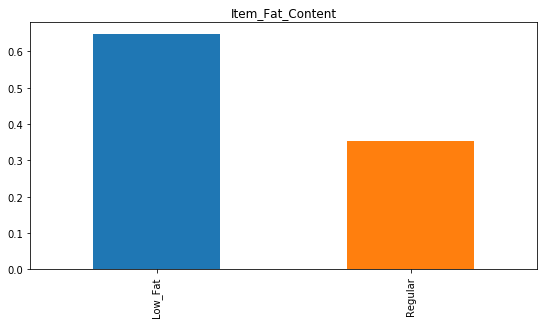

In [109]:
plt.figure(1)
plt.subplot(221)
train['Item_Fat_Content'].value_counts(normalize=True).plot.bar(figsize=(20,10),title= "Item_Fat_Content")
plt.show()

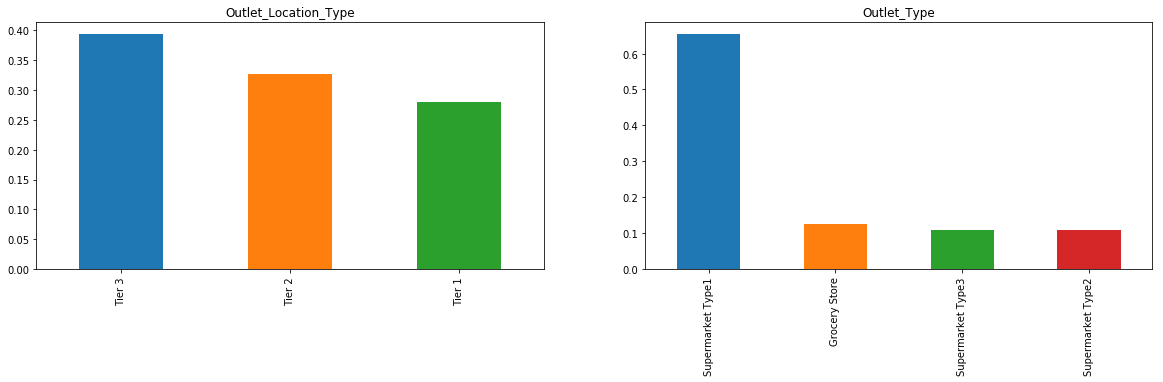

In [110]:
plt.figure(1)
plt.subplot(221)
train['Outlet_Location_Type'].value_counts(normalize=True).plot.bar(figsize=(20,10),title= "Outlet_Location_Type")

plt.subplot(222)
train['Outlet_Type'].value_counts(normalize=True).plot.bar(figsize=(20,10),title= "Outlet_Type")

plt.show()

#### Independent Varaible (Numerial Variables)

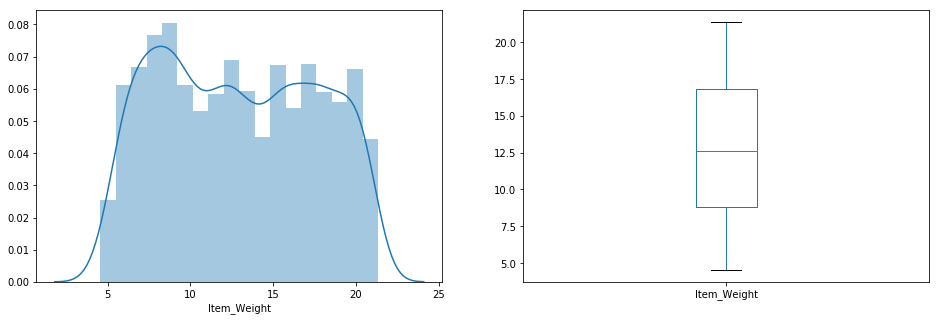

In [111]:
plt.figure(1)
plt.subplot(121)
df=train.dropna()
sns.distplot(df['Item_Weight'])

plt.subplot(122)
train['Item_Weight'].plot.box(figsize=(16,5))

plt.show()

####  its properly Distributed so not a issue. Now we will see Item_Visibility 

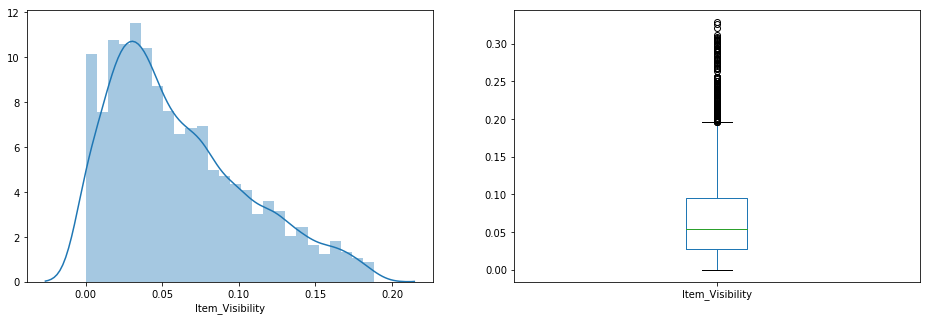

In [112]:
plt.figure(1)
plt.subplot(121)
df=train.dropna()
sns.distplot(df['Item_Visibility'])

plt.subplot(122)
train['Item_Visibility'].plot.box(figsize=(16,5))

plt.show()

####  its properly Distributed so not a issue. Now we will see Item_MRP  

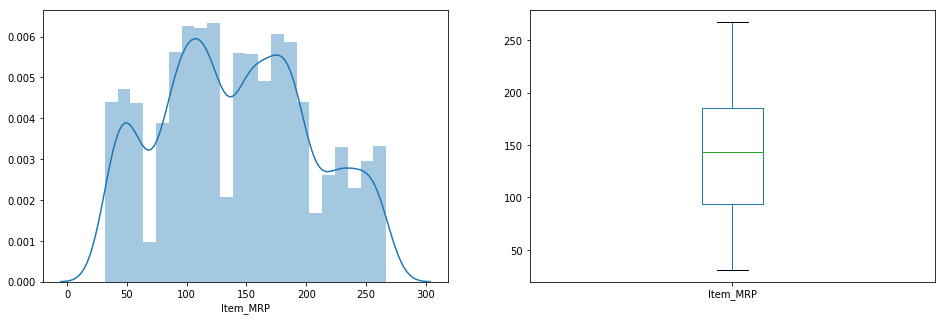

In [113]:
plt.figure(1)
plt.subplot(121)
df=train.dropna()
sns.distplot(df['Item_MRP'])

plt.subplot(122)
train['Item_MRP'].plot.box(figsize=(16,5))

plt.show()

#### its properly Distributed so not a issue. Now we will see Outlet_Establishment_Year

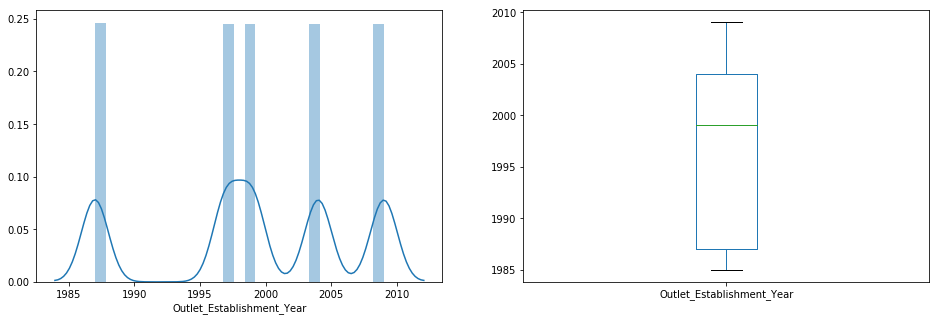

In [114]:
plt.figure(1)
plt.subplot(121)
df=train.dropna()
sns.distplot(df['Outlet_Establishment_Year'])

plt.subplot(122)
train['Outlet_Establishment_Year'].plot.box(figsize=(16,5))

plt.show()

## Step 3 : Bi-variate Analysis

Now we would like to know how well each feature correlate with Item_Outlet_Sales. So, in the next section we will look at bivariate analysis.

#### Categorical Independent Variable vs Target Variable

First of all we will find the relation between target variable and categorical independent variables. Let us look at the stacked bar plot

#### 1) Item_Fat_Content relation with Item_Outlet_Sales

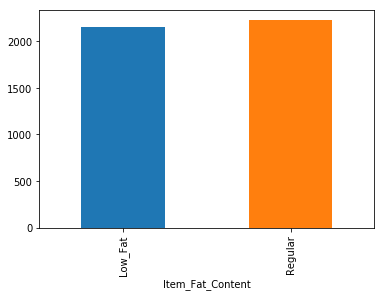

In [115]:
train.groupby('Item_Fat_Content')['Item_Outlet_Sales'].mean().plot.bar()

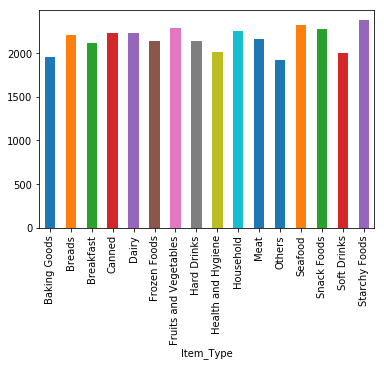

In [116]:
train.groupby('Item_Type')['Item_Outlet_Sales'].mean().plot.bar()

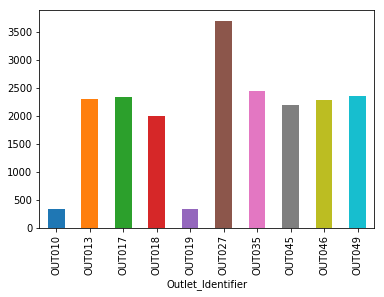

In [117]:
train.groupby('Outlet_Identifier')['Item_Outlet_Sales'].mean().plot.bar()

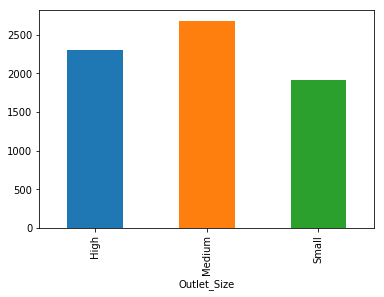

In [118]:
train.groupby('Outlet_Size')['Item_Outlet_Sales'].mean().plot.bar()

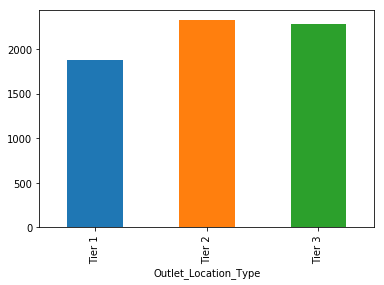

In [119]:
train.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].mean().plot.bar()

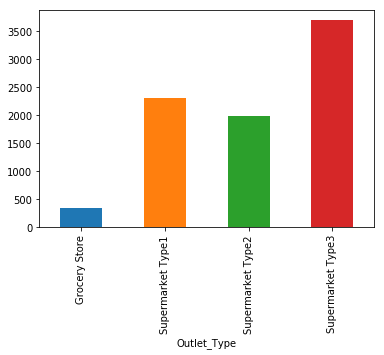

In [120]:
train.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().plot.bar()

#### Numerical Independent Variable vs Target Variable

In [121]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

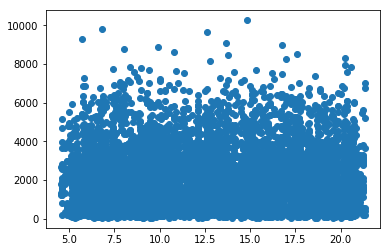

In [122]:
plt.scatter(train['Item_Weight'], train['Item_Outlet_Sales'])

Now lets look at the correlation between all the numerical variables. We will use the heat map to visualize the correlation. Heatmaps visualize data through variations in coloring. The variables with darker color means their correlation is more.

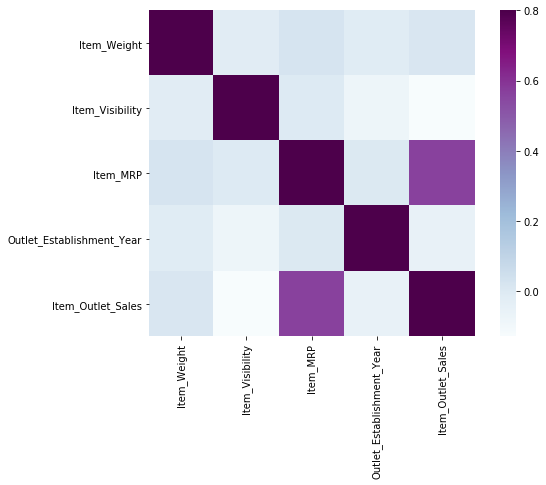

In [123]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

We see that the most correlated variables are (Item_MRP - Item_Outlet_Sales) and (Credit_History - Loan_Status). Outlet_Establishment_Year is also correlated with Item_Outlet_Sales.

## Step 4: Missing Value 

After exploring all the variables in our data, we can now impute the missing values and treat the outliers because missing data and outliers can have adverse effect on the model performance.

#### Missing value imputation

Let’s list out feature-wise count of missing values.

In [124]:
# Checking How many Null Values in training dataset
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

There are missing values in Item_Weight and Outlet_size features.

We will treat the missing values in all the features one by one.

We can consider these methods to fill the missing values:

For numerical variables: imputation using mean or median

For categorical variables: imputation using mode


In [125]:
# Lets Deal with Item_Weight First which is a Numerical Variable
train['Item_Weight'].value_counts()

# As we can see its spread 
train['Item_Weight'].fillna(train['Item_Weight'].mode()[0], inplace=True)

In [126]:
# Lets Deal with Outlet_Size First which is a Categorical Variable
train['Outlet_Size'].value_counts()

# As we can see its spread 
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0], inplace=True)

In [127]:
# Checking How many Null Values in training dataset
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Step 5: Outlier Treatment
As we saw earlier in univariate analysis, Item_Outlet_Sales contains outliers so we have to treat them as the presence of outliers affects the distribution of the data.

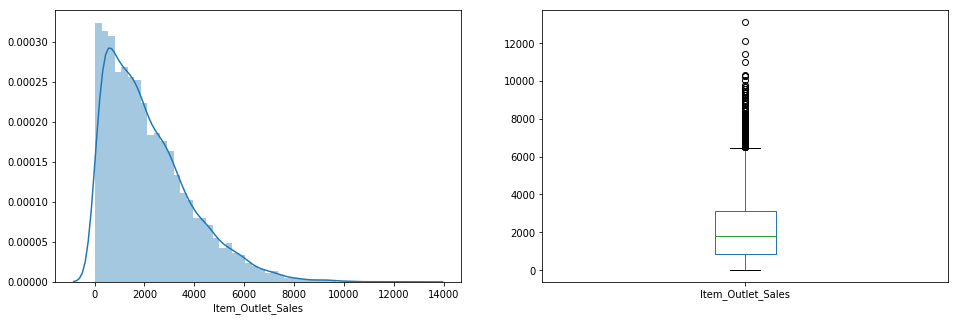

In [128]:
# Visulaize the target variable

plt.figure(1)
plt.subplot(121)
sns.distplot(train['Item_Outlet_Sales'])

plt.subplot(122)
train['Item_Outlet_Sales'].plot.box(figsize=(16,5))

plt.show()

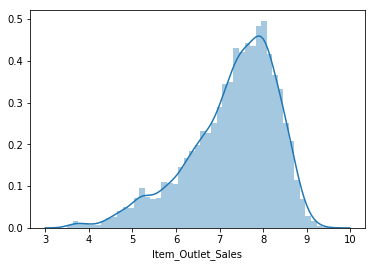

In [129]:
# As We can see the variable is not normally distributed so be normalize the varaible
train['Item_Outlet_Sales'] = np.log(train['Item_Outlet_Sales'])
sns.distplot(train['Item_Outlet_Sales'])

## Step 6 Model Fitting 

In [169]:
# Separting the Variable into Independent and Dependent 
X = train.iloc[:, 1:-1].values
y = train.iloc[:, -1].values


In [170]:
# Converting Categorical variables into dummy 
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder_X = LabelEncoder()

# Item_Fat_Content
X[:,1] = labelencoder_X.fit_transform(X[:,1])

# Item_Type
X[:,3] = labelencoder_X.fit_transform(X[:,3])

# Outlet_Identifier
X[:,5] = labelencoder_X.fit_transform(X[:,5])

# Outlet_Size
X[:,7] = labelencoder_X.fit_transform(X[:,7])

# Outlet_Location_Type
X[:,8] = labelencoder_X.fit_transform(X[:,8])

# Outlet_Location_Type
X[:,9] = labelencoder_X.fit_transform(X[:,9])

# Dummy Varaibles
onehotencoder = OneHotEncoder(categorical_features = [0])
X = onehotencoder.fit_transform(X).toarray()

In [171]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [172]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [92]:
# Fitting Multiple Linear regression on the Training set

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [173]:
# Fitting Polynomial Regression to Dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures()
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [187]:
# Fitting the SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X_train,y_train)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [183]:
# Fitting the Random Forest Model to the dataset
# Create your regressor her
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [179]:
# Predicting the test set results
y_pred = regressor.predict(X_test)
y_pred

array([7.88116858, 7.25596766, 7.62209044, ..., 8.15575976, 4.73181005,
       8.7093762 ])

In [188]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10)

accuracies.mean()
# accuracies.std()

0.7154917292629285